# Laboratorium 9 - DCT

In [1]:
import numpy as np
import cmath
from scipy.fft import fft
from time import time
import matplotlib.pyplot as plt

## DFT

In [2]:
def create_F (n):
    F = np.zeros((n,n), dtype=np.cdouble)
    k = -2 * cmath.pi / n
    dzeta = cmath.exp(complex(0, k))
    for i in range (n):
        for j in range (n):
            F[i, j] = dzeta ** (i * j)
    return F

def DFT (X):
    F = create_F(len(X))
    return F @ X

## IDFT

In [3]:
def IDFT (Y, X=False):
    if X:
        Y = DFT(Y)
    R = np.conj(Y)
    R = DFT(R)
    R = np.conj(R)
    return R / len(R)

## FFT

In [4]:
def FFT (X):
    n = len (X)
    if n == 2:
        return np.array([[1, 1], [1, -1]], dtype=np.cdouble) @ X
    F0 = FFT (X [0::2])
    F1 = FFT (X [1::2])
    dzeta = cmath.exp(-2j * cmath.pi / n)
    D = np.diag((dzeta * np.ones(n//2)) ** np.arange(n//2))
    return np.append(F0 + D @ F1, F0 - D @ F1)

## Testy poprawności i szybkości działania

Test dla k = 2
Test dla k = 4
Test dla k = 8
Test dla k = 16
Test dla k = 32
Test dla k = 64
Test dla k = 128
Test dla k = 256
Test dla k = 512
Test dla k = 1024
Wszystkie testy przebiegły prawidłowo


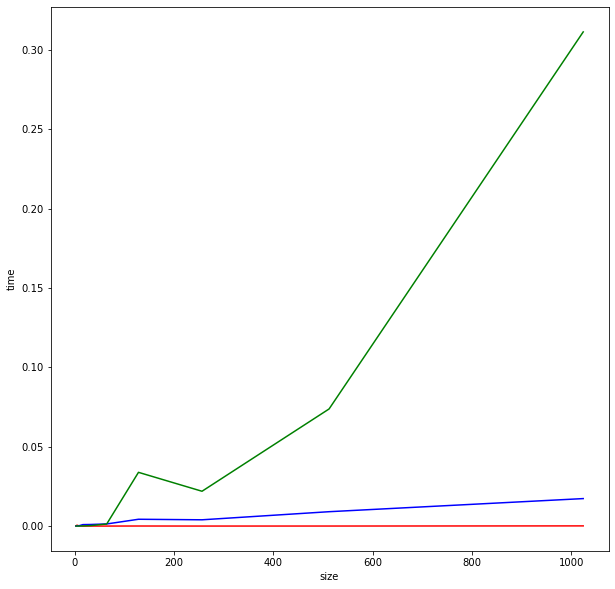

In [5]:
OX = []
OY_DFT = []
OY_FFT = []
OY_fft = []
flag = False
for i in range (1, 11):
    k = 2 ** i
    OX.append(k)
    X = np.random.rand (k) + np.random.rand (k) * 1j
    
    print ("Test dla k =", k)
    
    start = time()
    Y_DFT = DFT(X)
    end = time()
    OY_DFT.append(end - start)
    
    new_X = IDFT(Y_DFT)
    
    start = time()
    Y_FFT = FFT(X)
    end = time()
    OY_FFT.append(end - start)
    
    start = time()
    true_Y = fft(X)
    end = time()
    OY_fft.append(end - start)
    
    if np.allclose (X, new_X):
        pass
        #print ("Test IDFT przebiegł pozytywnie")
    else:
        print ("Tset IDFT przebiegł negatywnie")
        flag = True
    if np.allclose (Y_DFT, true_Y):
        pass
        #print ("Test DFT przebiegł pozytywnie")
    else:
        print ("Tset DFT przebiegł negatywnie")
        flag = True
    if np.allclose (Y_FFT, true_Y):
        pass
        #print ("Test FFT przebiegł pozytywnie")
    else:
        print ("Tset FFT przebiegł negatywnie")
        flag = True

if flag:
    print ("Pojawiły się błędy")
else:
    print ("Wszystkie testy przebiegły prawidłowo")
    
plt.figure(figsize=(10,10))
plt.plot(OX, OY_fft, color='red')
plt.plot(OX, OY_FFT, color='blue')
plt.plot(OX, OY_DFT, color='green')
plt.ylabel("time")
plt.xlabel("size")
plt.show()

Zgodnie z oczekiwaniami FFT (niebieska linia) jest dużo szybszy od DFT (zielona linia). Najszybsza jest funkcja biblioteczna (czerwona linia). Wszystkie zaimplementowane funkcje działają prawidłowo.

## DFT w 1D

In [6]:
function = lambda x, f : np.sin(2 * np.pi * f * x)

def make_signals (frequency):
    k = len (frequency)
    s = 256
    X = np.linspace (-2 * np.pi, 2 * np.pi, s)
    signal2 = np.zeros(s)
    signals = []
    for i, f in enumerate(frequency):
        signals.append(function(X, f))
        signal2[i*s//k : (i+1)*s//k] = signals[-1][i*s//k : (i+1)*s//k]
    signals = np.array(signals)
    signal1 = np.sum(signals, axis=0)
    plt.figure (figsize=(10,20))
    plt.subplot(211, title="Sygnał sumowany")
    plt.plot(X, signal1)
    plt.subplot(212, title="Sygnał łączony")
    plt.plot(X, signal2)
    plt.show()
    return X, signal1, signal2

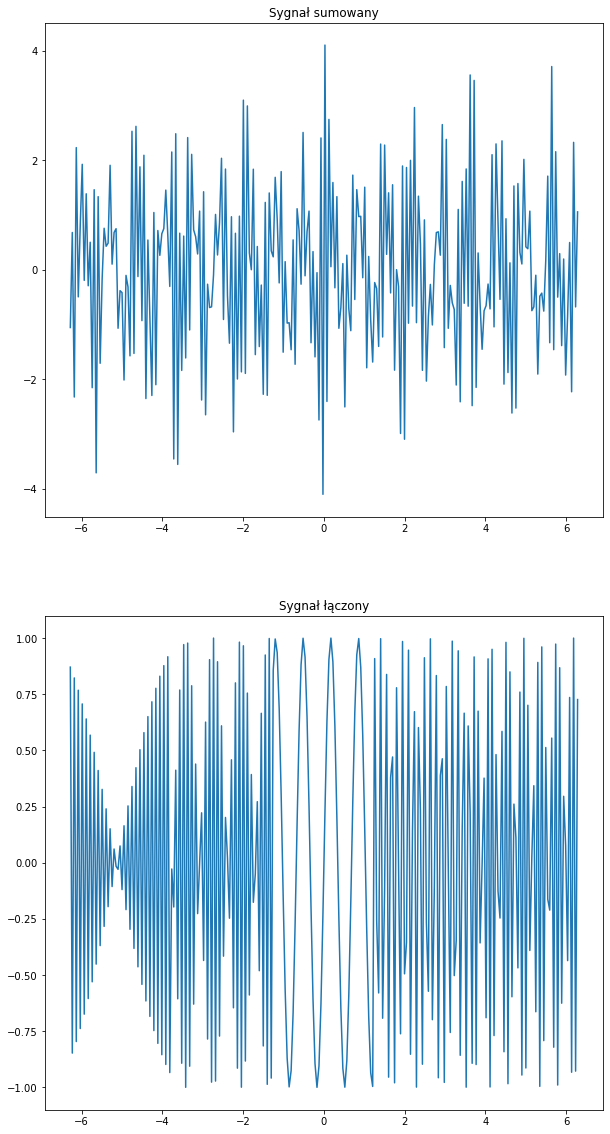

In [7]:
frequency = [10, 50, 100, 500, 2000]
X, sig1, sig2 = make_signals (frequency)

In [8]:
res1 = fft(sig1)
Ycos1 = np.real(res1)
Ysin1 = np.imag(res1)
res2 = fft(sig2)
Ycos2 = np.real(res2)
Ysin2 = np.imag(res2)

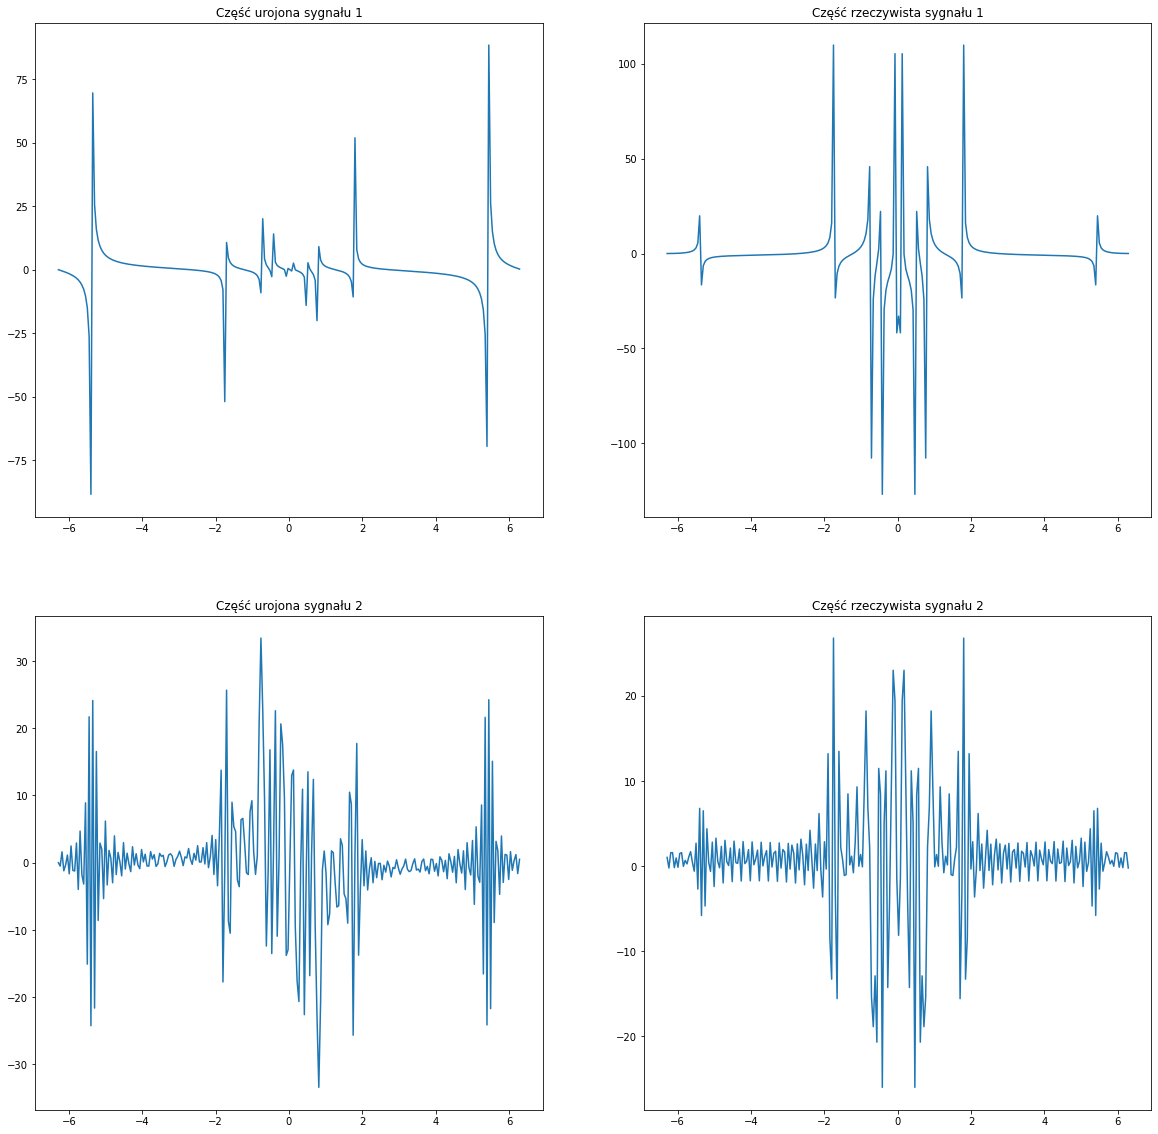

In [9]:
plt.figure (figsize=(20,20))
plt.subplot(221, title="Część urojona sygnału 1")
plt.plot(X, Ysin1)
plt.subplot(222, title="Część rzeczywista sygnału 1")
plt.plot(X, Ycos1)
plt.subplot(223, title="Część urojona sygnału 2")
plt.plot(X, Ysin2)
plt.subplot(224, title="Część rzeczywista sygnału 2")
plt.plot(X, Ycos2)
plt.show()

W wyniku transformacji otrzymujemy powyższe wykresy. Możemy zauważyć, że dla obydwu sygnałów otrzymujemy piki w tych samych miejscach. Sygnały różnią się w czasie jednakże powstały na bazie 5 takich samych sygnałów. Transformacja Fouriera nie rozpoznaje zmian w czasie tylko dokonuje całościowej analizy. Nie pozwala na odróżnienie podanych dwóch sygnałów na podstawie analizy pików. Nalezy zauważyć, że dla sygnału 2 uzyskujemy bardzo duży szum. Jest to różnica pomiędzy tymi wykresami.